<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-10 21:22:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.1MB/s    in 2.6s    

2025-07-10 21:22:46 (59.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_2697/897446143.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroups')[['JobSatPoints_6', 'JobSatPoints_7']].median()


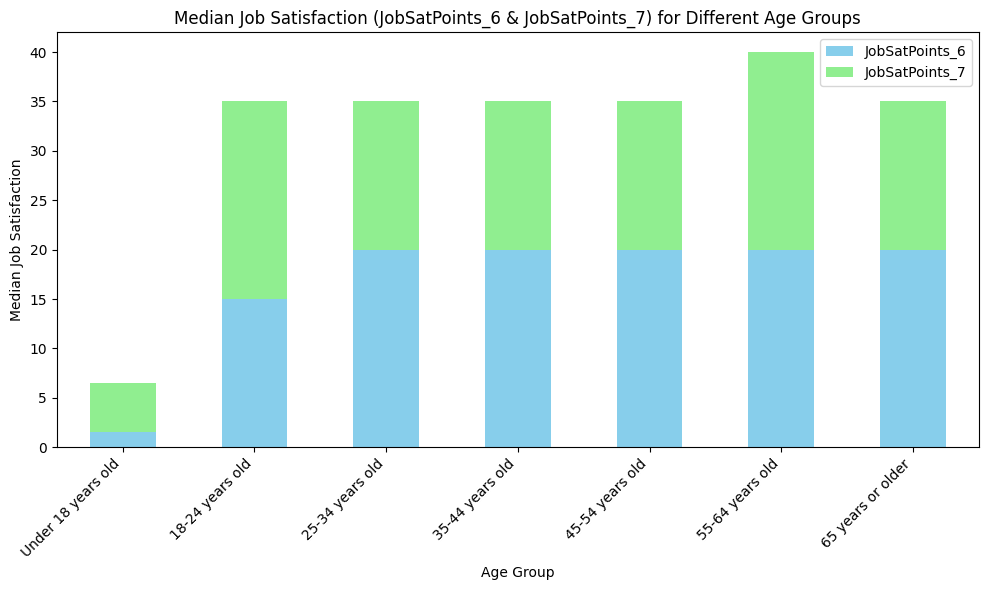

In [7]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Clean the data
df['Age'] = df['Age'].replace('Prefer not to say', pd.NA)
df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'], inplace=True)

# Define the desired order of the age categories
age_order1 = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older']

# Convert the 'Age' column to a categorical type with the defined order
df['AgeGroups'] = pd.Categorical(df['Age'], categories=age_order1, ordered=True)

# Group by 'Age' and calculate the median of 'JobSatPoints_6' and 'JobSatPoints_7'
grouped = df.groupby('AgeGroups')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create a stacked bar chart 
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) for Different Age Groups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_2697/2935496326.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


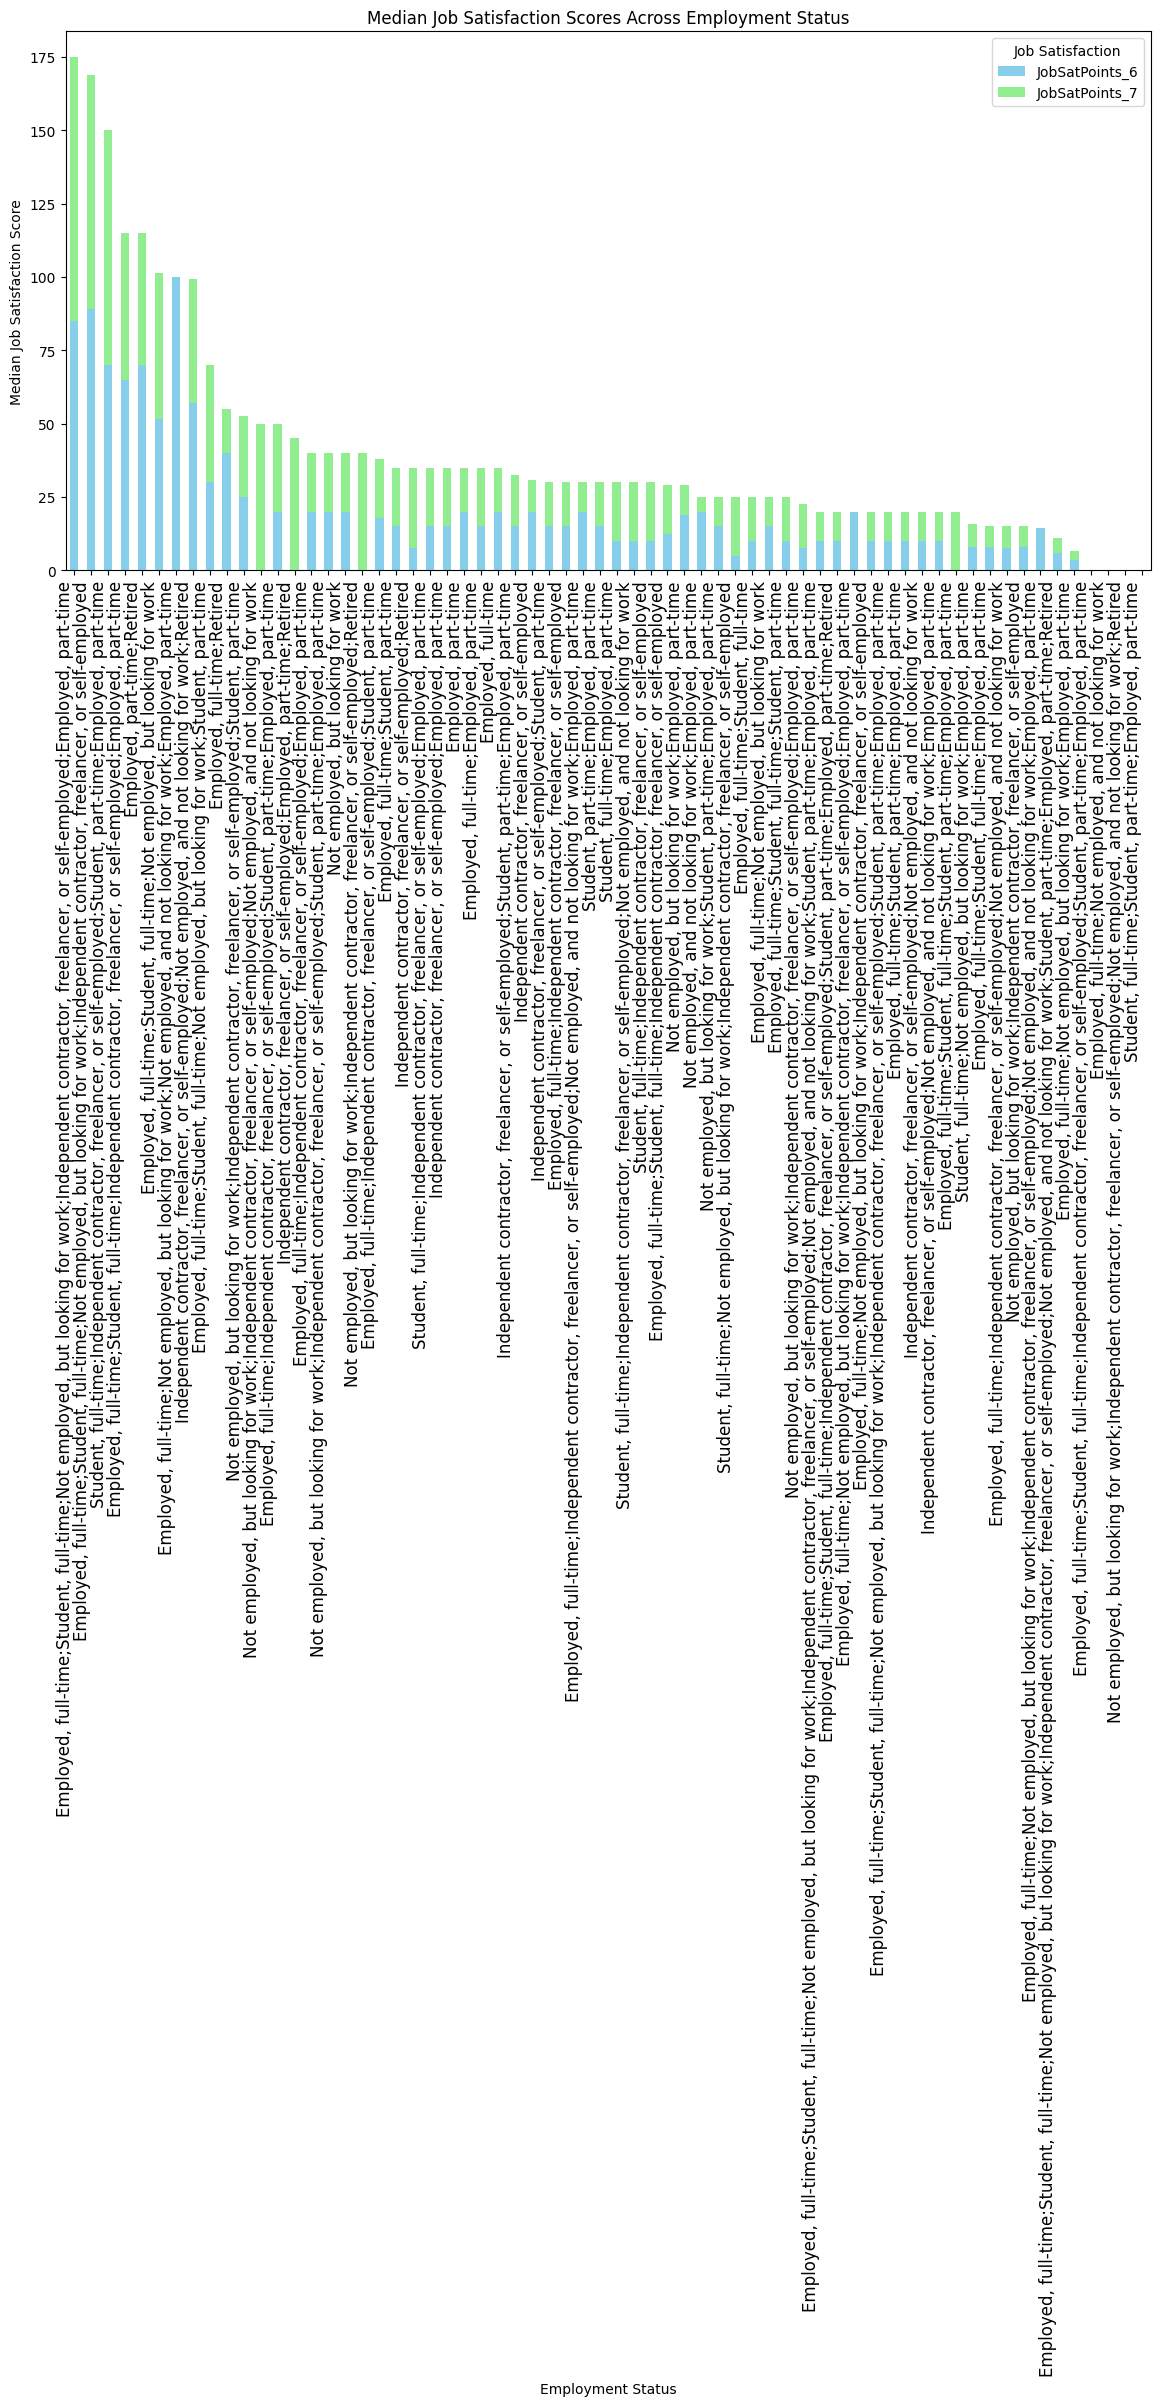

In [8]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Step 1: Group by employment status and calculate median
job_satisfaction = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 2: Sort by total satisfaction score (optional)
job_satisfaction['Total'] = job_satisfaction['JobSatPoints_6'] + job_satisfaction['JobSatPoints_7']
job_satisfaction = job_satisfaction.sort_values('Total', ascending=False).drop(columns='Total')

# Step 3: Plot
fig, ax = plt.subplots(figsize=(14, 7))
job_satisfaction.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightgreen'])

# Step 4: Customize chart
ax.set_title('Median Job Satisfaction Scores Across Employment Status')
ax.set_ylabel('Median Job Satisfaction Score')
ax.set_xlabel('Employment Status')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.legend(title='Job Satisfaction')
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_2697/2424879009.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroups2')[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()


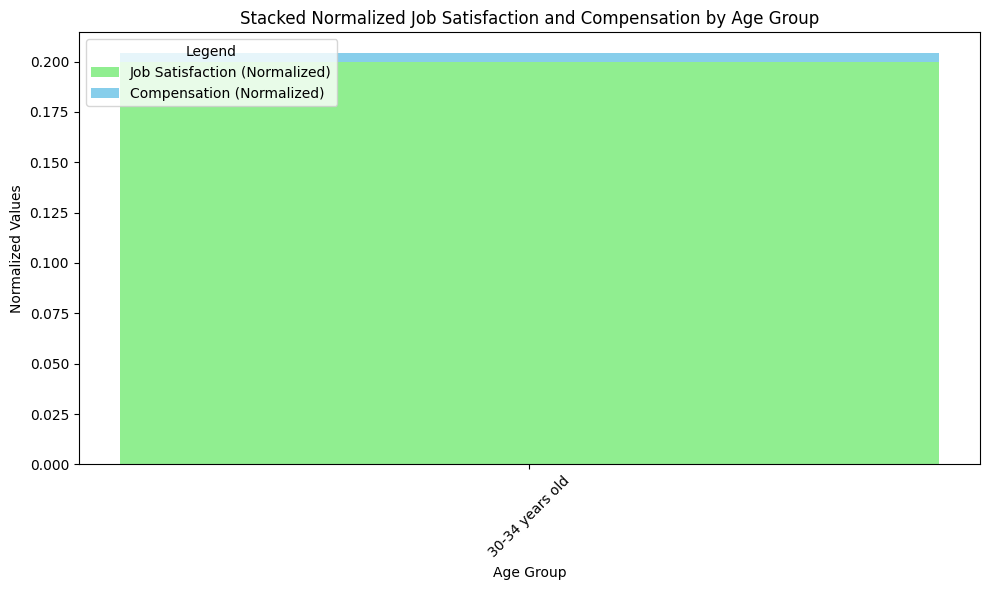

In [9]:
##Write your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract midpoints from age ranges
def extract_age_midpoint(age_str):
    if 'years old' in str(age_str):
        age_range = age_str.split(' ')[0]
        try:
            start_age, end_age = map(int, age_range.split('-'))
            return (start_age + end_age) / 2
        except ValueError:
            return np.nan
    return np.nan

# Apply the function to create numerical age values
df['AgeMid'] = df['Age'].apply(extract_age_midpoint)

# Drop rows where AgeMid is NaN
df = df.dropna(subset=['AgeMid'])

# Define age group 30-35
bins = [29.5, 35]  
labels = ['30-34 years old']
df['AgeGroups2'] = pd.cut(df['AgeMid'], bins=bins, labels=labels, right=False)

# Normalize JobSatPoints_6 and ConvertedCompYearly
df['JobSatPoints_6_normalized'] = (df['JobSatPoints_6'] - df['JobSatPoints_6'].min()) / (df['JobSatPoints_6'].max() - df['JobSatPoints_6'].min())
df['ConvertedCompYearly_normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

# Group by 'AgeGroups2' and calculate the median
grouped = df.groupby('AgeGroups2')[['ConvertedCompYearly_normalized', 'JobSatPoints_6_normalized']].median()

# Create Stacked Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped.index, grouped['JobSatPoints_6_normalized'], color='lightgreen', label='Job Satisfaction (Normalized)', width=0.6)
ax.bar(grouped.index, grouped['ConvertedCompYearly_normalized'], color='skyblue', label='Compensation (Normalized)', width=0.6, bottom=grouped['JobSatPoints_6_normalized'])

# Labels and Formatting
ax.set_xlabel('Age Group')
ax.set_ylabel('Normalized Values')
ax.set_title('Stacked Normalized Job Satisfaction and Compensation by Age Group')
plt.xticks(rotation=45)
ax.legend(loc='upper left', title="Legend")

plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_2697/2795010435.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroups')[['ConvertedCompYearly', 'JobSat']].median()


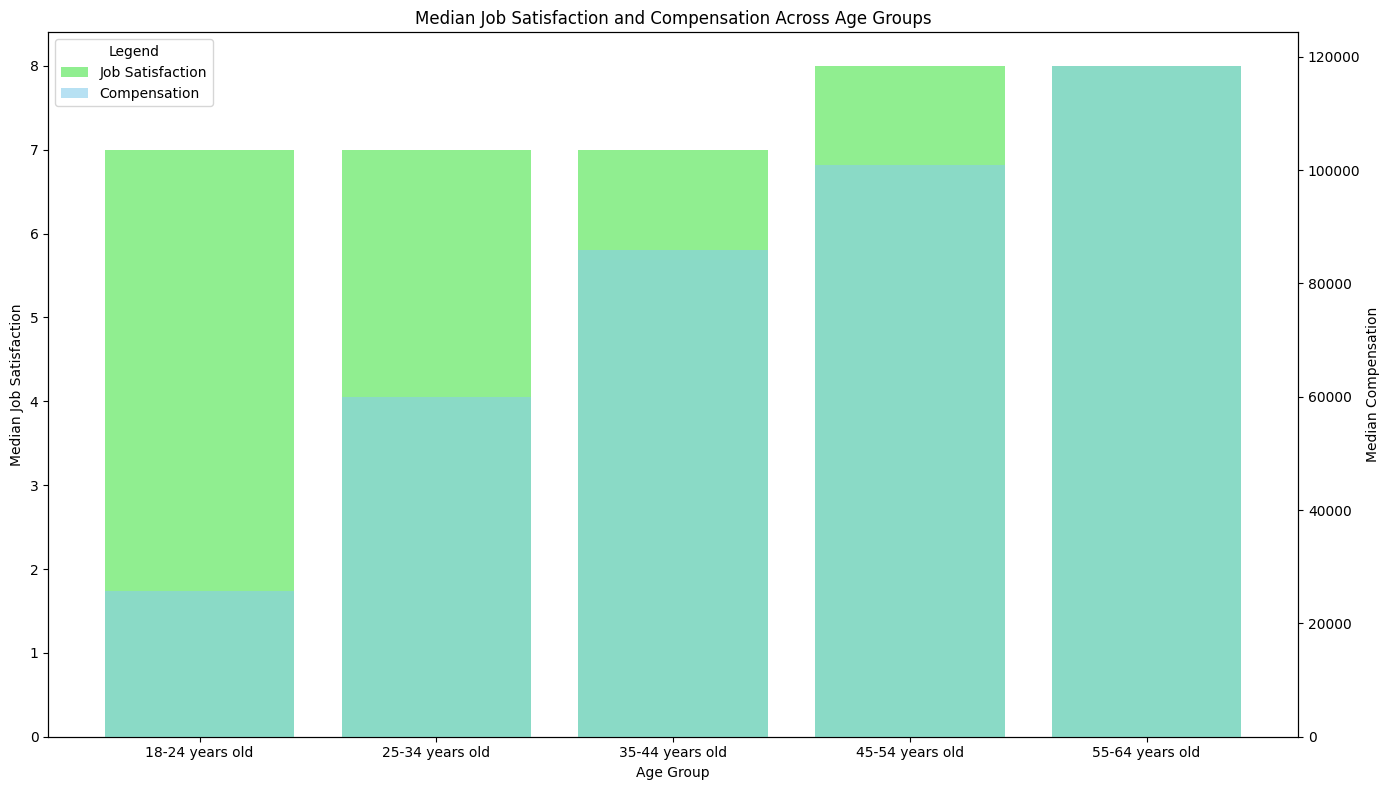

In [10]:
##Write your code here

# Group by 'Age' and calculate the median of compensation and job satisfaction
grouped = df.groupby('AgeGroups')[['ConvertedCompYearly', 'JobSat']].median()

# Plotting with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot JobSat on the primary y-axis
bars1 = ax1.bar(grouped.index, grouped['JobSat'], color='lightgreen', label='Job Satisfaction')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Median Job Satisfaction', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create the secondary y-axis for Compensation
ax2 = ax1.twinx()
bars2 = ax2.bar(grouped.index, grouped['ConvertedCompYearly'], color='skyblue', alpha=0.6, label='Compensation')
ax2.set_ylabel('Median Compensation', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Median Job Satisfaction and Compensation Across Age Groups')
plt.xticks(rotation=45)
ax1.legend(handles=[bars1, bars2], labels=['Job Satisfaction', 'Compensation'], loc='upper left', title="Legend")
plt.tight_layout()

plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_2697/1506459698.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_db.groupby(['AgeGroups', 'DatabaseAdmired'])
/tmp/ipykernel_2697/1506459698.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_counts['Proportion'] = db_counts.groupby('AgeGroups')['Count'].transform(lambda x: x / x.sum())


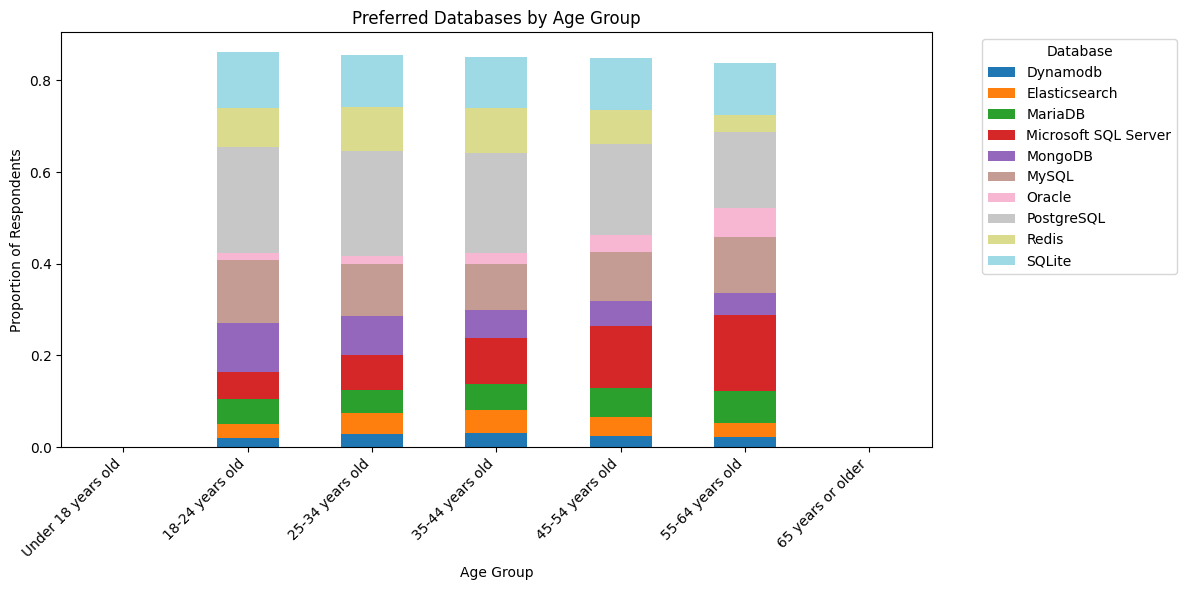

In [11]:
##Write your code here

# Drop rows where Age or DatabaseAdmired is missing
df_db = df.dropna(subset=['Age', 'DatabaseAdmired']).copy()

# Define age group categories (you may adjust based on your dataset)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Convert Age to ordered category
df_db['AgeGroups'] = pd.Categorical(df_db['Age'], categories=age_order, ordered=True)

# Split the DatabaseAdmired column into list
df_db['DatabaseAdmired'] = df_db['DatabaseAdmired'].str.split(';')

# Explode the list into individual rows
df_db = df_db.explode('DatabaseAdmired')

# Strip whitespace from each database name
df_db['DatabaseAdmired'] = df_db['DatabaseAdmired'].str.strip()

# Count number of mentions per database by age group
db_counts = (
    df_db.groupby(['AgeGroups', 'DatabaseAdmired'])
    .size()
    .reset_index(name='Count')
)

# Calculate proportions
db_counts['Proportion'] = db_counts.groupby('AgeGroups')['Count'].transform(lambda x: x / x.sum())

# Filter top 10 databases overall
top_dbs = df_db['DatabaseAdmired'].value_counts().nlargest(10).index
db_counts = db_counts[db_counts['DatabaseAdmired'].isin(top_dbs)]

# Pivot for plotting
pivot_db = db_counts.pivot(index='AgeGroups', columns='DatabaseAdmired', values='Proportion').fillna(0)

# Plot
pivot_db.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_2697/1029232412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


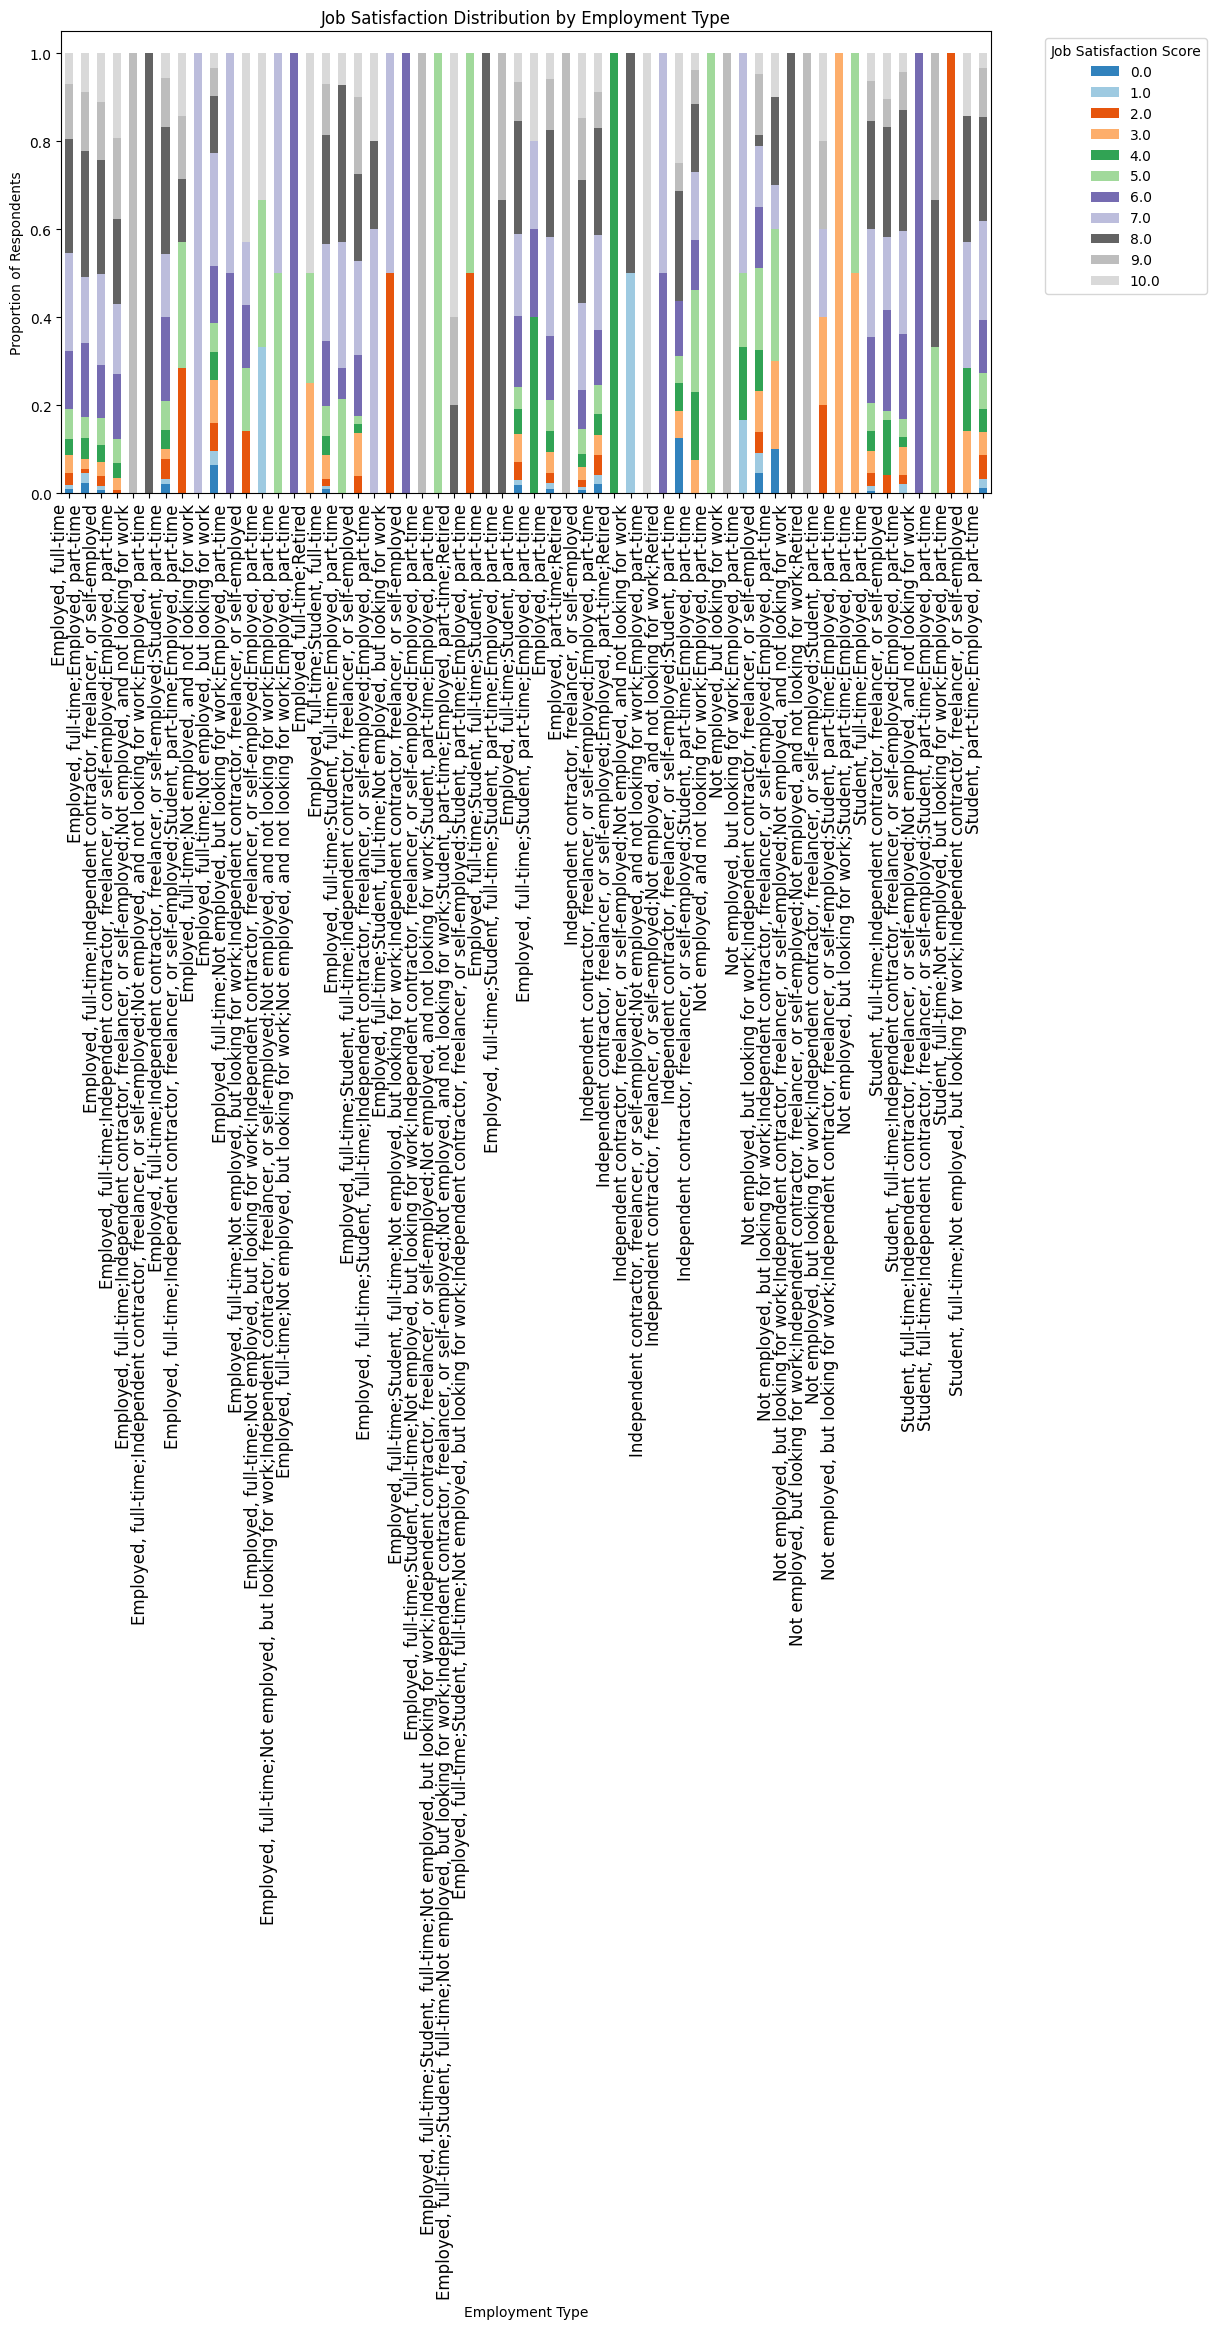

In [12]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values
df_emp = df.dropna(subset=['Employment', 'JobSat']).copy()

# Convert satisfaction scores to string for better color grouping in plot
df_emp['JobSatPoints_6'] = df_emp['JobSat'].astype(str)

# Count number of each score per employment type
job_sat_counts = (
    df_emp.groupby(['Employment', 'JobSat'])
    .size()
    .reset_index(name='Count')
)

# Calculate proportions
job_sat_counts['Proportion'] = job_sat_counts.groupby('Employment')['Count'].transform(lambda x: x / x.sum())

# Pivot for stacked bar chart
pivot = job_sat_counts.pivot(index='Employment', columns='JobSat', values='Proportion').fillna(0)

# Plot
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title('Job Satisfaction Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.legend(title='Job Satisfaction Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_2697/60602113.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['AgeGroups', 'Language'])
/tmp/ipykernel_2697/60602113.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts['Proportion'] = counts.groupby('AgeGroups')['Count'].transform(lambda x: x / x.sum())


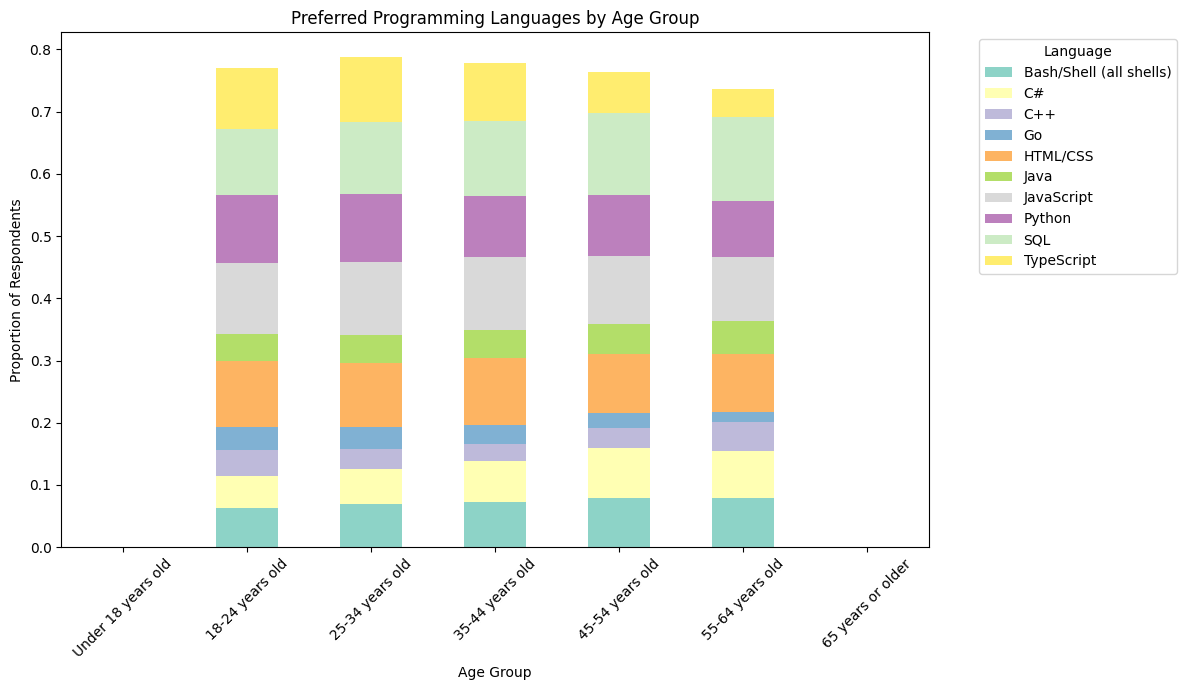

In [13]:
##Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in key columns
df_lang = df.dropna(subset=['AgeGroups', 'LanguageAdmired']).copy()

# Split multi-response field into separate rows
df_lang_exploded = df_lang.assign(
    Language=df_lang['LanguageAdmired'].str.split(';')
).explode('Language')

# Remove leading/trailing spaces
df_lang_exploded['Language'] = df_lang_exploded['Language'].str.strip()

# Count occurrences
counts = (
    df_lang_exploded
    .groupby(['AgeGroups', 'Language'])
    .size()
    .reset_index(name='Count')
)

# Normalize by age group to get proportions
counts['Proportion'] = counts.groupby('AgeGroups')['Count'].transform(lambda x: x / x.sum())

# filter for top 10 languages overall
top_languages = (
    counts.groupby('Language')['Count'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

filtered = counts[counts['Language'].isin(top_languages)]

# Pivot for plotting
pivot = filtered.pivot(index='AgeGroups', columns='Language', values='Proportion').fillna(0)

# Sort age groups if categorical
pivot = pivot.loc[df['AgeGroups'].cat.categories]

pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')

plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_2697/2189893638.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


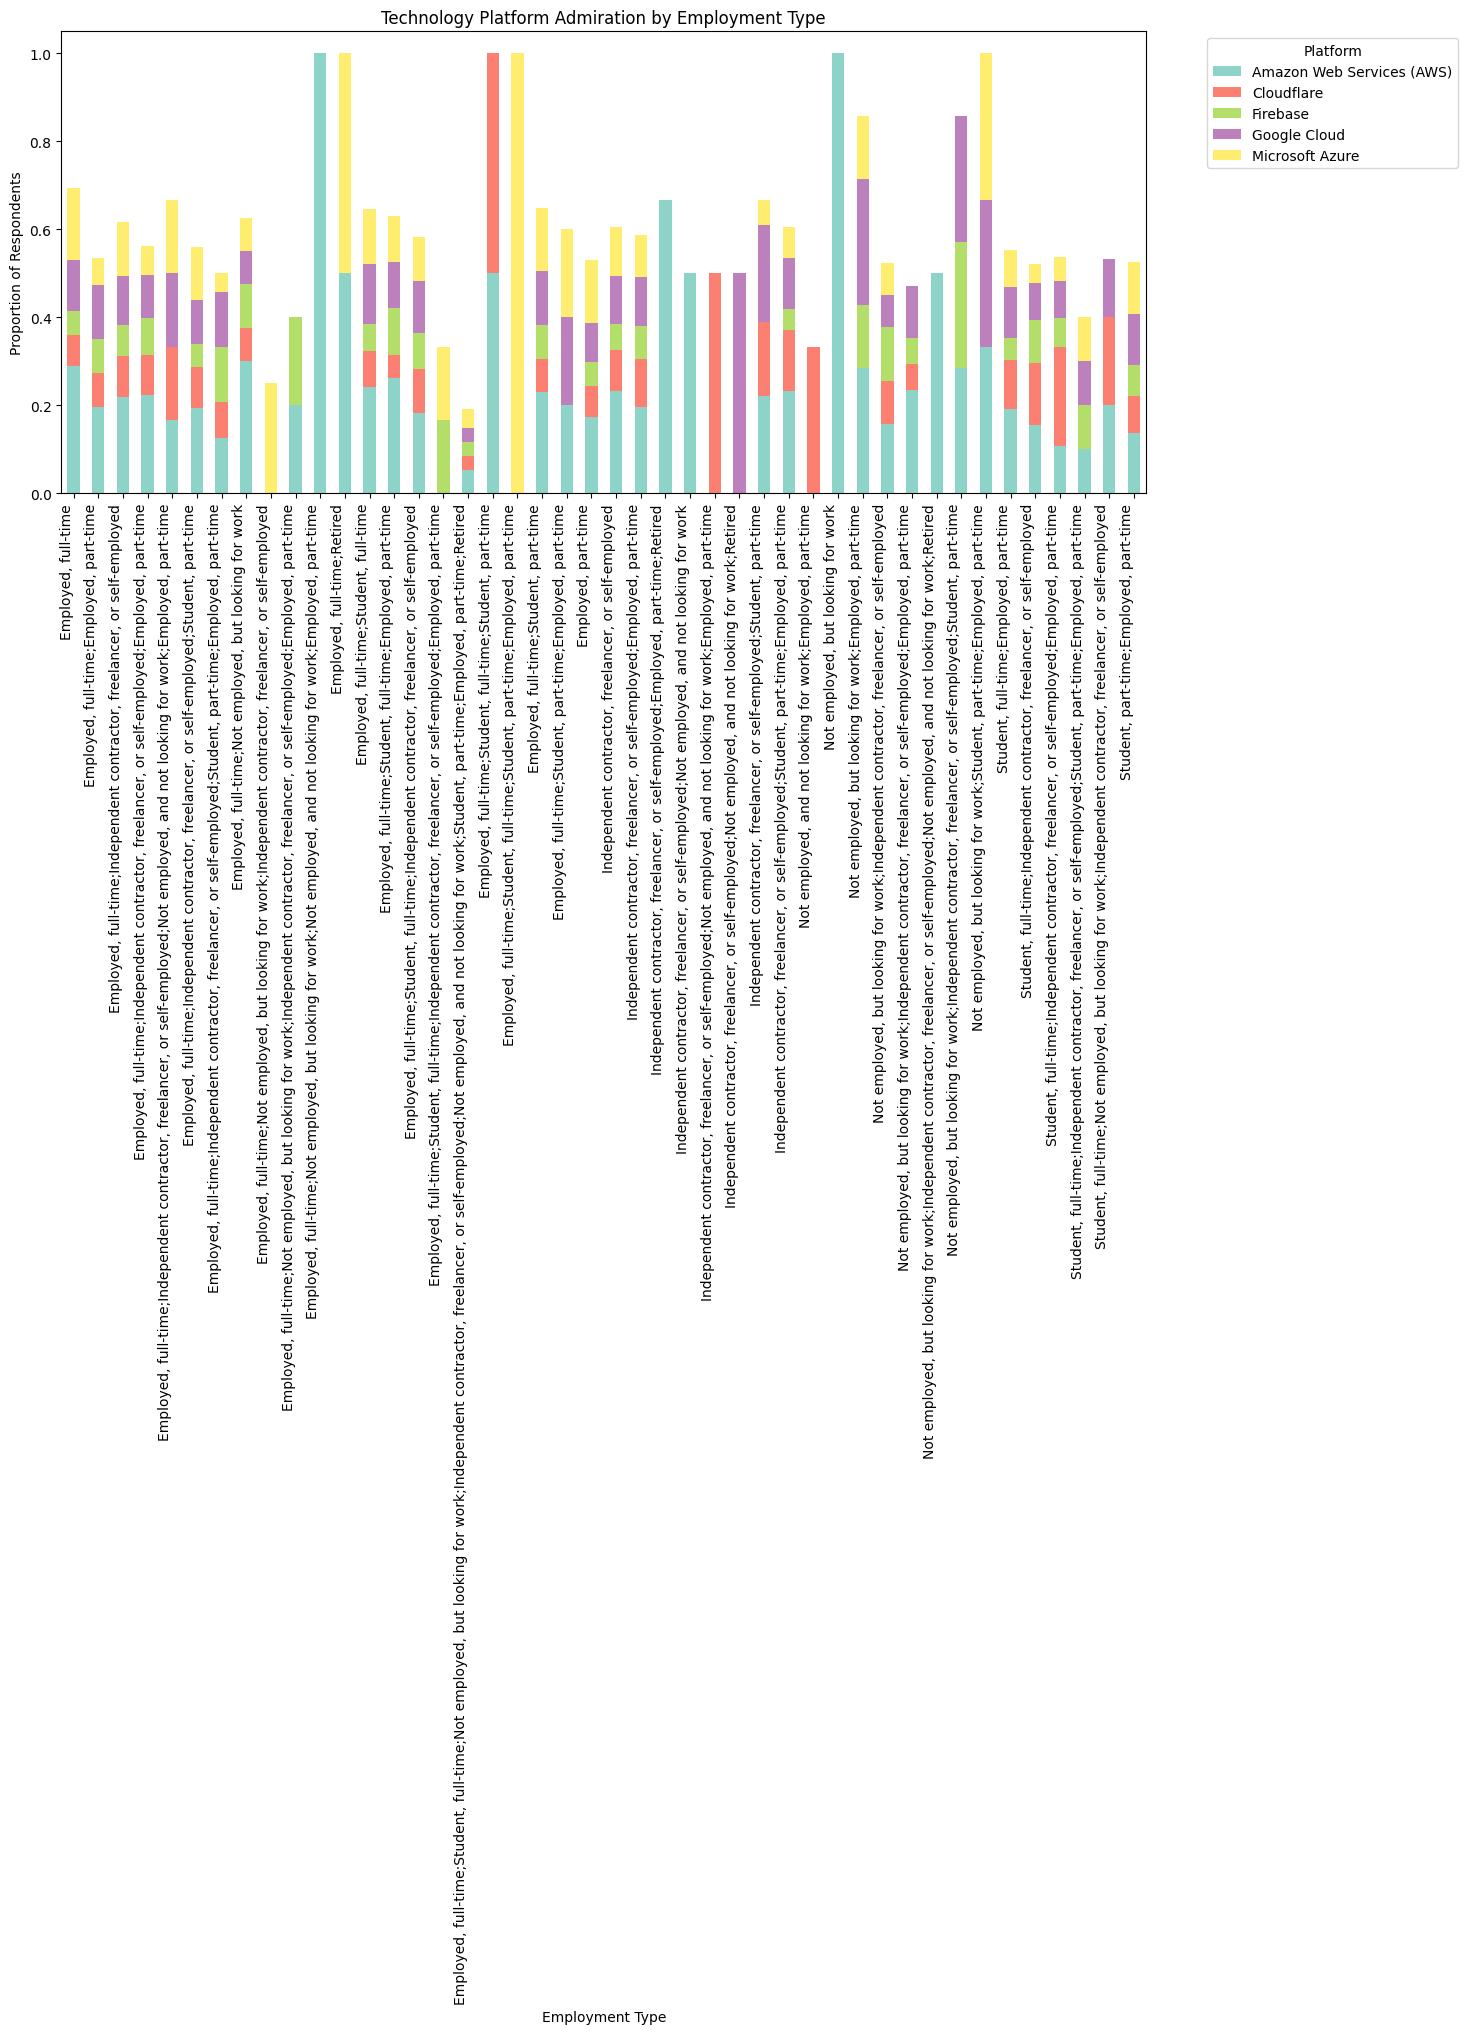

In [14]:
##Write your code here

# Drop rows where PlatformAdmired or Employment is missing
df_platform = df.dropna(subset=['PlatformAdmired', 'Employment']).copy()

# Split semicolon-separated platforms into a list
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.split(';')

# Explode list into separate rows
df_platform = df_platform.explode('PlatformAdmired')

# Strip whitespace
df_platform['PlatformAdmired'] = df_platform['PlatformAdmired'].str.strip()

# Count occurrences of each platform per employment type
platform_counts = (
    df_platform.groupby(['Employment', 'PlatformAdmired'])
    .size()
    .reset_index(name='Count')
)

# Calculate proportions
platform_counts['Proportion'] = platform_counts.groupby('Employment')['Count'].transform(lambda x: x / x.sum())

# Focus on top 5 admired platforms across all employment types
top_platforms = df_platform['PlatformAdmired'].value_counts().nlargest(5).index
platform_counts = platform_counts[platform_counts['PlatformAdmired'].isin(top_platforms)]

# Pivot the data for stacked bar plotting
pivot_platforms = platform_counts.pivot(index='Employment', columns='PlatformAdmired', values='Proportion').fillna(0)

# Plot
pivot_platforms.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set3')

plt.title('Technology Platform Admiration by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
